<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install scikit-image

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier

# **Part 1**

In [4]:


def calculate_lbp(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_image.shape
    lbp_image = np.zeros_like(gray_image, dtype=np.uint8)
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]

    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            center_pixel = gray_image[r, c]
            binary_string = ''
            for (dr, dc) in offsets:
                neighbor_pixel = gray_image[r + dr, c + dc]
                binary_string += '1' if neighbor_pixel >= center_pixel else '0'

            lbp_value = int(binary_string, 2)
            lbp_image[r, c] = lbp_value

    return lbp_image


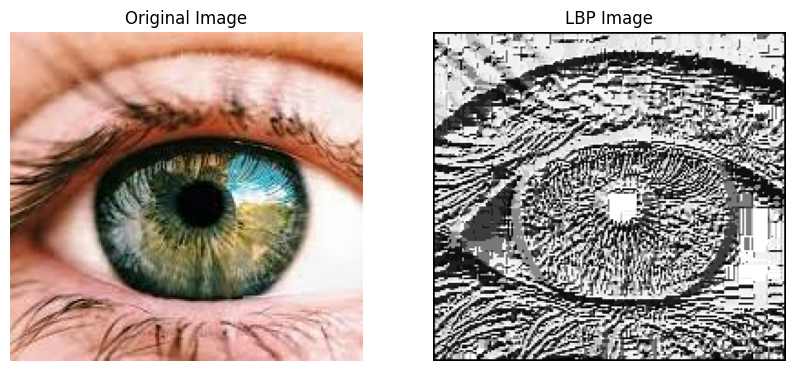

In [5]:
image = cv2.imread("/content/pic.jpeg")
lbp_image = calculate_lbp(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("LBP Image")
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.show()


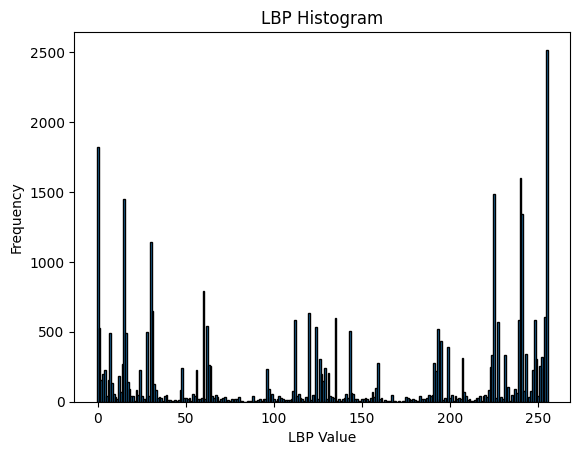

In [6]:
def calculate_histogram(image, num_bins=256):

    histogram = [0] * num_bins

    # Flatten the image into a 1D array
    flat_image = image.ravel()

    # Count occurrences of each pixel value
    for pixel_value in flat_image:
        histogram[pixel_value] += 1

    return histogram


histogram = calculate_histogram(lbp_image)
plt.figure()
plt.title("LBP Histogram")
plt.bar(range(len(histogram)), histogram, width=1, edgecolor='black')
plt.xlabel("LBP Value")
plt.ylabel("Frequency")
plt.show()

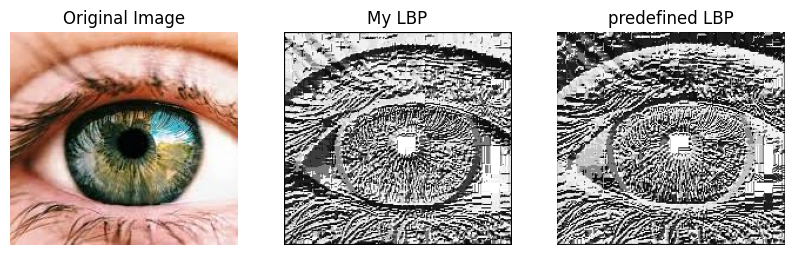

In [8]:


image = cv2.imread("./pic.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lbp_predefined = local_binary_pattern(gray_image, P=8, R=1, method='default')
lbp_image = calculate_lbp(image)



plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("My LBP")
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("predefined LBP")
plt.imshow(lbp_predefined, cmap='gray')
plt.axis('off')

plt.show()



# **Part 2**


In [10]:
!pip install opendatasets

In [18]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmad5hamdy12/orl-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdessamiguebli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmad5hamdy12/orl-dataset


100%|██████████| 3.61M/3.61M [00:00<00:00, 146MB/s]

In [19]:
# brodatz: https://sipi.usc.edu/database/database.php?volume=textures
!wget https://sipi.usc.edu/database/textures.zip -O brodatz.zip
!unzip brodatz.zip
!mv textures/ brodatz/

--2024-12-12 10:59:48--  https://sipi.usc.edu/database/textures.zip
Resolving sipi.usc.edu (sipi.usc.edu)... 68.181.2.90
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29720623 (28M) [application/zip]
Saving to: ‘brodatz.zip’

brodatz.zip         100%[===================>]  28.34M  37.2MB/s    in 0.8s    

2024-12-12 10:59:49 (37.2 MB/s) - ‘brodatz.zip’ saved [29720623/29720623]

Archive:  brodatz.zip
   creating: textures/
  inflating: textures/1.1.01.tiff    
  inflating: textures/1.1.02.tiff    
  inflating: textures/1.1.03.tiff    
  inflating: textures/1.1.04.tiff    
  inflating: textures/1.1.05.tiff    
  inflating: textures/1.1.06.tiff    
  inflating: textures/1.1.07.tiff    
  inflating: textures/1.1.08.tiff    
  inflating: textures/1.1.09.tiff    
  inflating: textures/1.1.10.tiff    
  inflating: textures/1.1.11.tiff    
  inflating: textures/1.1.12.tiff    
  inflating: textures/1.1.13.tiff  

In [65]:
import cv2
import os

def load_brodatz_images(path):
    images = []
    labels = []
    for file_name in os.listdir(path):
        if file_name.endswith(".tiff"):
            image_path = os.path.join(path, file_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is None:
                print(f"Warning: Failed to load {image_path}")
            else:
                # Extract the label (substring before the second ".")
                label = '.'.join(file_name.split('.')[:2])
                images.append(img)
                labels.append(label)
    return images, labels

# Load images and labels
brodatz_images, brodatz_labels = load_brodatz_images('./brodatz')
print(f"Loaded {len(brodatz_images)} images from Brodatz dataset.")
print(f"Example labels: {brodatz_labels[:5]}")


Loaded 64 images from Brodatz dataset.
Example labels: ['1.1', '1.3', '1.1', '1.3', 'texmos2.s512']


In [66]:
def load_orl_images(path):
    images = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):  # Check if it's a folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".pgm"):
                    image_path = os.path.join(folder_path, file_name)
                    images.append(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))
                    labels.append(folder)  # Use folder name as the label
    return images, labels

orl_images, orl_labels = load_orl_images('./orl-dataset/ORL')
print(f"Loaded {len(orl_images)} images from ORL dataset.")


Loaded 400 images from ORL dataset.


In [67]:
import cv2
import os

def load_brodatz_images(path):
    images = []
    for file_name in os.listdir(path):
        if file_name.endswith(".tiff"):
            image_path = os.path.join(path, file_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: Failed to load {image_path}")
            else:
                images.append(img)
    return images

brodatz_images = load_brodatz_images('./brodatz')
print(f"Loaded {len(brodatz_images)} images from Brodatz dataset.")


Loaded 64 images from Brodatz dataset.


In [68]:
def convert_to_grayscale(images):
    grayscale_images = []
    for idx, img in enumerate(images):
        if len(img.shape) == 3:  # RGB image (3 channels)
            grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            grayscale_images.append(grayscale_img)
        elif len(img.shape) == 2:  # Already grayscale (1 channel)
            grayscale_images.append(img)
        else:
            print(f"Skipping invalid image {idx} with shape {img.shape}")
    return grayscale_images

# Convert Brodatz images to grayscale if needed
brodatz_images = convert_to_grayscale(brodatz_images)


In [69]:
def validate_images(images, dataset_name="Dataset"):
    valid_images = []
    for idx, img in enumerate(images):
        if img is None:
            print(f"Warning: {dataset_name} Image {idx} is not loaded properly.")
        elif len(img.shape) != 2:  # Ensure it has exactly 2 dimensions (grayscale)
            print(f"Warning: {dataset_name} Image {idx} is not a valid grayscale image. Skipping.{len(img.shape)}")
        else:
            valid_images.append(img)
    return valid_images

# Validate Brodatz images
brodatz_images = validate_images(brodatz_images, dataset_name="Brodatz")

orl_images = validate_images(orl_images)


In [70]:
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)


In [71]:
from google.colab.patches import cv2_imshow

In [72]:
import cv2

def histogram_equalization(image):
    # Step 1: Flatten the image to 1D
    flattened_image = image.ravel()
    N=len(flattened_image)
    eq=[]
    Vmin = np.min(flattened_image)
    Vmax = np.max(flattened_image)
    for v in flattened_image:
      S=0
      for j in flattened_image:
        if j<=v: S+=1
      CfN= S/N
      eq.append((Vmax - Vmin) * CfN + Vmin)
    img_equalized = np.array(eq).reshape(image.shape).astype(np.uint8)


    return img_equalized




In [19]:
image=cv2.imread('./1.pgm', cv2.IMREAD_GRAYSCALE)
equalized_image = histogram_equalization(image)

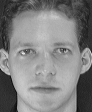

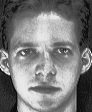

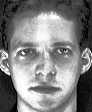

In [20]:
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(cv2.equalizeHist(image))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
def equalize_histogram(image):
    # Convert to grayscale if the image has multiple channels
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Ensure the image is uint8 and apply histogram equalization
    return cv2.equalizeHist(image)



In [74]:
def preprocess_images(images):
    preprocessed = []
    for img in images:
        filtered = apply_median_filter(img)
        equalized = equalize_histogram(filtered)
        preprocessed.append(equalized)
    return preprocessed

brodatz_preprocessed = preprocess_images(brodatz_images)
orl_preprocessed = preprocess_images(orl_images)


In [75]:
def calculate_lbp(image):
    rows, cols = image.shape


    lbp_image = np.zeros_like(image, dtype=np.uint8)

    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            center_pixel = image[r, c]
            binary_string = ''
            for dr, dc in offsets:
                neighbor_pixel = image[r + dr, c + dc]
                binary_string += '1' if neighbor_pixel >= center_pixel else '0'

            lbp_value = int(binary_string, 2)
            lbp_image[r, c] = lbp_value

    return lbp_image


In [76]:
def calculate_grayscale_histogram(image):

    flat_image = image.ravel()

    histogram = [0] * 256

    for intensity in flat_image:
        histogram[intensity] += 1

    return histogram


In [77]:
def calculate_lbp_histogram(image):
    lbp_image = calculate_lbp(image)

    flat_lbp = lbp_image.ravel()

    histogram = [0] * 256

    for lbp_value in flat_lbp:
        histogram[lbp_value] += 1

    return histogram


In [78]:
def calculate_histograms_for_dataset(images):
    grayscale_histograms = []
    lbp_histograms = []

    for img in images:
        grayscale_histograms.append(calculate_grayscale_histogram(img))
        lbp_histograms.append(calculate_lbp_histogram(img))

    return grayscale_histograms, lbp_histograms




In [79]:
# Calculate histograms for the datasets
brodatz_gray_histograms, brodatz_lbp_histograms = calculate_histograms_for_dataset(brodatz_images)
print("brodatz finished")

brodatz finished


In [80]:
orl_gray_histograms, orl_lbp_histograms = calculate_histograms_for_dataset(orl_images)

print("Histograms calculated successfully.")

Histograms calculated successfully.


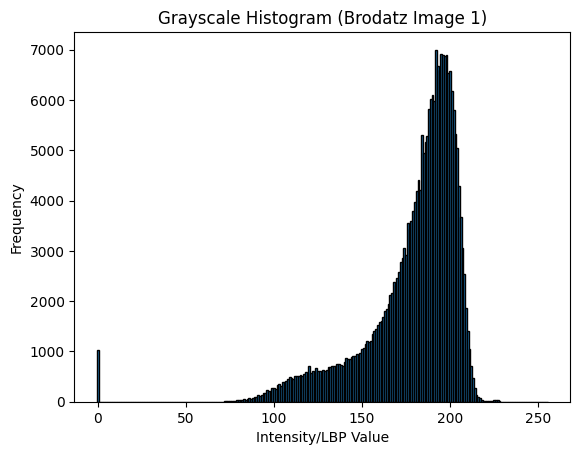

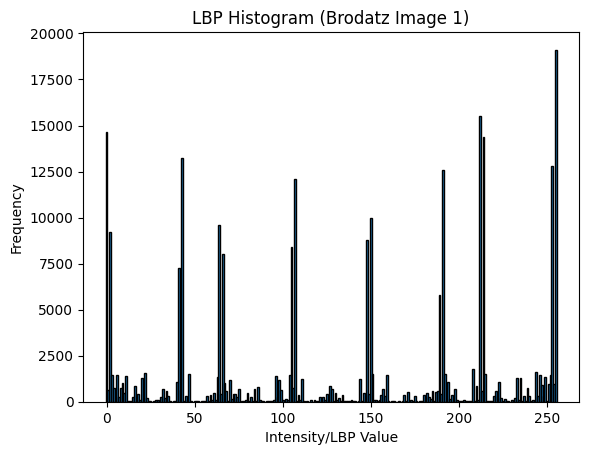

In [81]:
def plot_histogram(histogram, title):
    plt.figure()
    plt.bar(range(len(histogram)), histogram, width=1, edgecolor='black')
    plt.title(title)
    plt.xlabel("Intensity/LBP Value")
    plt.ylabel("Frequency")
    plt.show()

# Example: Display histogram for the first Brodatz image
plot_histogram(brodatz_gray_histograms[0], "Grayscale Histogram (Brodatz Image 1)")
plot_histogram(brodatz_lbp_histograms[0], "LBP Histogram (Brodatz Image 1)")


In [82]:

def calculate_mean(image):
    return np.mean(image)


In [83]:
def calculate_variance(image):
    mean = calculate_mean(image)
    return np.mean((image - mean) ** 2)


In [84]:
def calculate_skewness(image):
    mean = calculate_mean(image)
    skewness = np.mean((image - mean) ** 3)
    return skewness


In [85]:
def calculate_histogram(image, bins=256, range=(0, 256)):
    # Flatten the image and compute the histogram
    hist, _ = np.histogram(image.ravel(), bins=bins, range=range)
    # Normalize the histogram
    hist_normalized = hist / hist.sum()  # Sum to 1
    return hist_normalized

def calculate_lbp_histogram(image, radius=1, n_points=8, bins=256):
    # Compute LBP image
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    # Compute the histogram of LBP patterns
    hist, _ = np.histogram(lbp.ravel(), bins=bins, range=(0, bins))
    # Normalize the histogram
    hist_normalized = hist / hist.sum()  # Sum to 1
    return hist_normalized


In [86]:
def extract_combined_features(image):
    # Calculate statistical features
    mean = calculate_mean(image)
    variance = calculate_variance(image)
    skewness = calculate_skewness(image)

    # Calculate histograms
    grayscale_hist = calculate_histogram(image)
    lbp_hist = calculate_lbp_histogram(image)

    # Combine all features into a single feature vector
    combined_features = np.concatenate(([mean, variance, skewness], grayscale_hist, lbp_hist))
    return combined_features


In [87]:
def extract_features_for_dataset(images):
    features = []
    for img in images:
        combined_features = extract_combined_features(img)
        features.append(combined_features)
    return np.array(features)

brodatz_combined_features = extract_features_for_dataset(brodatz_images)
orl_combined_features = extract_features_for_dataset(orl_images)



In [88]:

all_combined_features = np.vstack((brodatz_combined_features, orl_combined_features))
all_combined_labels = brodatz_labels + orl_labels

In [89]:
print(all_combined_labels)

['1.1', '1.3', '1.1', '1.3', 'texmos2.s512', '1.1', '1.4', '1.4', '1.3', '1.2', '1.2', '1.3', '1.4', '1.4', '1.2', '1.4', '1.2', '1.2', 'texmos3.s512', '1.2', '1.1', '1.4', '1.1', '1.4', '1.3', '1.2', '1.1', '1.1', '1.2', '1.3', '1.3', '1.3', '1.3', 'texmos3.p512', '1.1', '1.2', '1.4', '1.5', '1.5', '1.4', '1.1', '1.1', '1.4', '1.4', 'texmos3b.p512', 'texmos1.p512', '1.4', '1.1', '1.3', 'texmos2.p512', '1.1', '1.5', '1.2', '1.5', '1.2', '1.2', '1.1', '1.3', '1.5', '1.3', '1.5', '1.3', '1.2', '1.5', 's13', 's13', 's13', 's13', 's13', 's13', 's13', 's13', 's13', 's13', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's11', 's11', 's11', 's11', 's11', 's11', 's11', 's11', 's11', 's11', 's18', 's18', 's18', 's18', 's18', 's18', 's18', 's18', 's18', 's18', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's5', 's5', 's5'

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(all_combined_features, all_combined_labels)

# Cross-validation
accuracy_rf = cross_val_score(rf, all_combined_features, all_combined_labels, cv=5)
print("Random Forest Cross-validated accuracy:", accuracy_rf.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Cross-validated accuracy: 0.9202898550724639


In [98]:
test_image = orl_images[0]
test_label = orl_labels[0]
test_features = extract_combined_features(test_image).reshape(1, -1)
test_image2= brodatz_images[0]
test_label2 = brodatz_labels[0]
test_features2 = extract_combined_features(test_image2).reshape(1, -1)

In [97]:
# Predict the class of the test image
predicted_class = rf.predict(test_features)
predicted_class2 = rf.predict(test_features2)
print("Predicted Class:", predicted_class[0]," real Class:",test_label)
print("Predicted Class:", predicted_class2[0]," real Class:",test_label2)


Predicted Class: s13  real Class: s13
Predicted Class: 1.1  real Class: 1.1
